In [163]:
from collections import deque
import random
import time
from matplotlib import pyplot as plt

In [157]:
class Node:
    def __init__(self, key):
        self.value = key
        self.left = None
        self.right = None
        self.height = 1

In [158]:
class AVLTree:
    def __init__(self):
        self.root = None

    def height(self, node):
        if not node:
            return 0
        return node.height

    def balance(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)

    def insert(self, root, value):
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        root.height = 1 + max(self.height(root.left), self.height(root.right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and value < root.left.value:
            return self.right_rotate(root)

        # Right rotation
        if balance < -1 and value > root.right.value:
            return self.left_rotate(root)

        # Left-Right rotation
        if balance > 1 and value > root.left.value:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)

        # Right-Left rotation
        if balance < -1 and value < root.right.value:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)

        return root

    def delete(self, root, value):
        if not root:
            return root

        if value < root.value:
            root.left = self.delete(root.left, value)
        elif value > root.value:
            root.right = self.delete(root.right, value)
        else:
            if not root.left:
                temp = root.right
                root = None
                return temp
            elif not root.right:
                temp = root.left
                root = None
                return temp

            temp = self.min_value_node(root.right)
            root.value = temp.value
            root.right = self.delete(root.right, temp.value)

        if not root:
            return root

        root.height = 1 + max(self.height(root.left), self.height(root.right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and self.balance(root.left) >= 0:
            return self.right_rotate(root)

        # Right rotation
        if balance < -1 and self.balance(root.right) <= 0:
            return self.left_rotate(root)

        # Left-Right rotation
        if balance > 1 and self.balance(root.left) < 0:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)

        # Right-Left rotation
        if balance < -1 and self.balance(root.right) > 0:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)

        return root

    def left_rotate(self, current):
        child = current.right
        old_left = child.left

        child.left = current
        current.right = old_left

        current.height = 1 + max(self.height(current.left), self.height(current.right))
        child.height = 1 + max(self.height(child.left), self.height(child.right))

        return child

    def right_rotate(self, current):
        child = current.left
        old_right = child.right

        child.right = current
        current.left = old_right

        current.height = 1 + max(self.height(current.left), self.height(current.right))
        child.height = 1 + max(self.height(child.left), self.height(child.right))

        return child

    def min_value_node(self, root):
        current = root
        while current.left:
            current = current.left
        return current

    def search(self, root, value):
        if not root or root.value == value:
            return root
        if root.value < value:
            return self.search(root.right, value)
        return self.search(root.left, value)

    def insert_value(self, value):
        self.root = self.insert(self.root, value)

    def delete_value(self, value):
        self.root = self.delete(self.root, value)

    def search_value(self, value):
        return self.search(self.root, value)


In [159]:
def print_bst_visual(tree):
    if not tree.root:
        print("The tree is empty.")
        return

    # Queue for level-order traversal
    queue = deque([(tree.root, 0)])  # (node, level)
    current_level = 0
    level_nodes = []

    while queue:
        node, level = queue.popleft()

        # If we move to a new level, print the previous level
        if level != current_level:
            print("Level", current_level, ":", " ".join(level_nodes))
            level_nodes = []
            current_level = level

        # Add the current node's key to the level's list
        level_nodes.append(str(node.value))

        # Add children to the queue
        if node.left:
            queue.append((node.left, level + 1))
        if node.right:
            queue.append((node.right, level + 1))

    # Print the last level
    if level_nodes:
        print("Level", current_level, ":", " ".join(level_nodes))

In [160]:
def generateRandomKeyList(len, max):
    return [random.randint(0, max) for _ in range(len)]

In [161]:
def avgInsertionTime(tree, items):
    times = [None] * (len(items))
    for idx, item in enumerate(items):
        start = time.time()
        tree.insert_value(item)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)

def avgRetrievalTime(tree, items):
    times = [None] * len(items)
    for idx, item in enumerate(items):
        start = time.time()
        tree.search_value(item)
        end = time.time()
        times[idx] = end - start
    return sum(times) / len(times)

In [162]:
#testing
items =  generateRandomKeyList(3000, 5000)
avgSortedInsertionTime = [None] * len(items)
avgUnsortedInsertionTime = [None] * len(items)
avgSortedRetrievalTime = [None] * len(items)
avgUnsortedRetrievalTime = [None] * len(items)
for i in range(1, len(items)):
    keys = items[:i]
    tree = AVLTree()
    avgUnsortedInsertionTime[i] = avgInsertionTime(tree, keys)
    avgUnsortedRetrievalTime[i] = avgRetrievalTime(tree, keys)
    keys.sort()
    tree = AVLTree()
    avgSortedInsertionTime[i] = avgInsertionTime(tree, keys)
    avgSortedRetrievalTime[i] = avgRetrievalTime(tree, keys)

Text(0.5, 1.0, 'Average Unsorted Insertion Time')

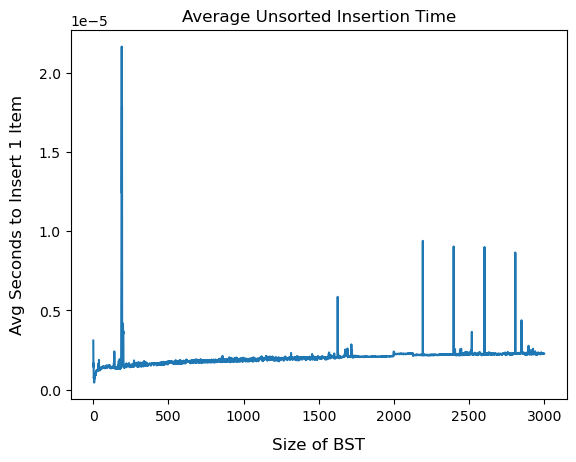

In [164]:
plt.plot(avgUnsortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Insertion Time")

Text(0.5, 1.0, 'Average Unsorted Retrieval Time')

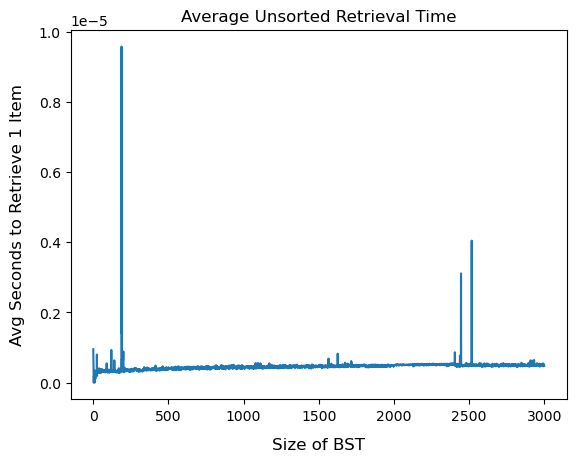

In [165]:
plt.plot(avgUnsortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieve 1 Item", fontsize=12, labelpad=10)
plt.title("Average Unsorted Retrieval Time")

Text(0.5, 1.0, 'Avg Sorted Insertion Time')

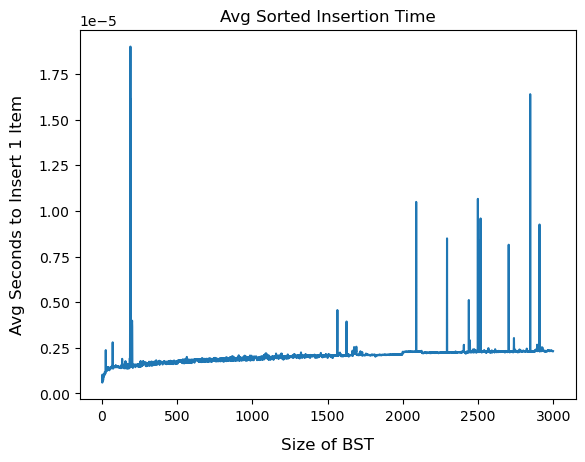

In [166]:
plt.plot(avgSortedInsertionTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Insert 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Insertion Time")

Text(0.5, 1.0, 'Avg Sorted Retrieval Time')

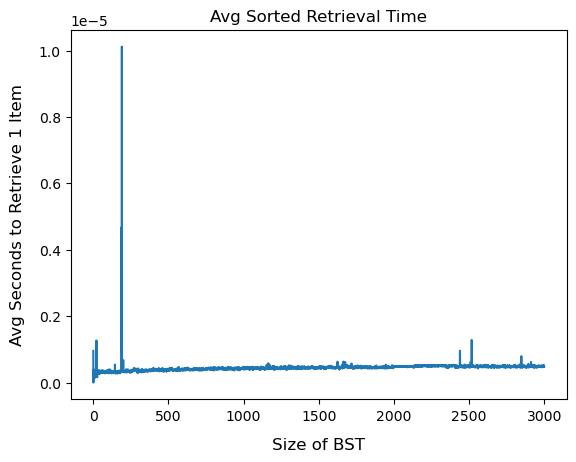

In [167]:
plt.plot(avgSortedRetrievalTime)
plt.xlabel("Size of BST", fontsize=12, labelpad=10)
plt.ylabel("Avg Seconds to Retrieve 1 Item", fontsize=12, labelpad=10)
plt.title("Avg Sorted Retrieval Time")